# Dark Sky Positions direct from Catalogue

In [9]:
import matplotlib.pyplot as plt
from astropy.io import fits as fits

import pkg_resources
pkg_resources.require("numpy==1.26.3")
import numpy as np
from scipy.spatial import distance_matrix

from dl import queryClient as qc
import pandas as pd

/Users/vernica/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [10]:
# timer function
import functools
import time

def timer(func):
    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        tic = time.perf_counter()
        value = func(*args, **kwargs)
        toc = time.perf_counter()
        elapsed_time = toc - tic
        print(elapsed_time)
        return value
    return wrapper_timer


## Querying tractor catalogue for one degree squares

In [11]:
@timer
def query_tractor(ra, dec, square, query_dist=1.0):
    """Queries the Astro Data Lab for the ra, dec and mag_g of the objects within a square of side length (dist).     
    dist is in degrees
    """
    # Bounds of the square we are querying objects for
    ra_min=ra
    ra_max = ra + query_dist*square
    dec_min=dec
    dec_max = dec + query_dist*square

    query = f"""
    SELECT ra, dec, mag_g
    FROM ls_dr10.tractor_s
    WHERE ra >= ({ra_min}) AND ra < ({ra_max})
    AND dec >= ({dec_min}) AND dec < ({dec_max})
    AND mag_g <= 21 AND mag_g >= 16
    """
    
    # check if this completes successfuly
    brick_info = qc.query(sql=query, fmt="pandas")
    return brick_info

In [22]:
for square in np.arange(40,120,10):
    query_tractor(0,-30,square)

KeyboardInterrupt: 

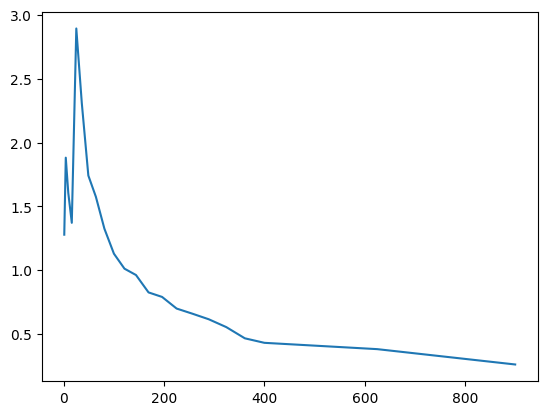

In [21]:
x = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 625, 900]
y = [1.2789743749999616, 7.527789000000041/4, 14.455102375000024/9, 21.94977908300001/16, 72.33531233299993/25, 83.05894341699991/36, 85.35484112500001/49, 100.86192695799991/64, 107.4080237500001/81, 113.01894195800003/100, 122.56287062500019/121, 138.68802762500013/144, 139.764082208/169, 155.17113345799999/196, 157.64259362500002/225, 169.22000945800005/256, 178.27083341599996/289, 179.95430566699997/324, 168.81875749999972/361, 172.9240558749998/400, 239.27568062499995/625, 236.5007538750001/900]

plt.plot(x,y)